In [93]:
from sklearn import datasets

In [94]:
mnist=datasets.load_digits()

In [95]:
import numpy as np
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [96]:
mnist.target=mnist.target.astype(np.int8)

In [97]:
x=mnist.data
y=mnist.target

In [98]:
y.shape

(1797,)

In [99]:
y[7]

7

In [100]:
import matplotlib
import matplotlib.pyplot as plt

In [101]:
some_digit=x[7]
some_digit_image=some_digit.reshape(8,8)

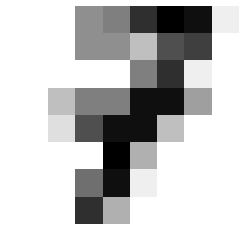

In [102]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [103]:
x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
shuffle_index=np.random.permutation(len(x_train))
x_traix=x_train[shuffle_index]
y_traix=y_train[shuffle_index]


In [104]:
y_train_7=(y_train==7)
y_test_7=(y_test==7)

In [105]:
y_train_7

array([False, False, False, ..., False, False, False])

In [106]:
class SGDClassifier:
  def __init__(self,y=5,random_state=None):
    print(random_state,y)
    def fit(self,x,y):
      print("Model is Classified")

In [107]:
sgd_clf=SGDClassifier(random_state=7)

7 5


In [118]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=0)
sgd_clf.fit(x_train,y_train_7)
sgd_clf.predict([x[9]])

array([False])

In [119]:
y_pred=sgd_clf.predict(x_train)

In [120]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [121]:
cm=confusion_matrix(y_train_7,y_pred)

In [122]:
cm

array([[1613,    5],
       [   3,  176]], dtype=int64)

In [123]:
accuracy_score(y_train_7,y_pred)

0.9955481357818586

In [124]:
from sklearn.model_selection import cross_val_predict,cross_val_score

In [128]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_7,cv=3)

In [129]:
len(y_train_pred)

1797

In [130]:
accuracy_score(y_train_7,y_train_pred)

0.9771841958820257

In [131]:
from sklearn.model_selection import cross_val_predict,cross_val_score

In [132]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_7,cv=3)

In [133]:
len(y_train_pred)

1797

In [134]:
y_score=sgd_clf.decision_function([x[4]])


In [135]:
y_score

array([-6494.17952468])

In [136]:
y_score=cross_val_predict(sgd_clf,x_train,y_train_7,cv=3,method="decision_function")

In [137]:
len( y_score)

1797

In [138]:
y_score

array([ -6314.37158515, -11423.19174551,  -6251.37043967, ...,
       -17300.3642817 , -13016.69256308, -19884.00740438])

In [139]:
from sklearn.metrics import roc_curve

In [140]:
fpr,tpr,the=roc_curve(y_train_7,y_score)

In [141]:
the

array([  9487.02933123,   9486.02933123,   1276.98773431,   1230.01558553,
          853.38297845,    831.96289366,    141.72894106,    108.88156491,
         -225.72887993,   -304.92141332,   -646.1162346 ,   -684.69370692,
        -1025.28349744,  -1191.23298263,  -1219.43777326,  -1324.32484813,
        -1340.06386659,  -1378.80457484,  -1453.92447615,  -1650.85497575,
        -1712.07703013,  -1724.95440887,  -1768.4798093 ,  -1811.37371836,
        -1819.95250017,  -1922.90537667,  -1943.86984742,  -2003.96428153,
        -2008.68570006,  -2189.22840072,  -2194.95577759,  -2227.17217965,
        -2231.7340272 ,  -2506.18205231,  -2596.33225425,  -2637.39564013,
        -2711.85153933,  -2807.78510176,  -2819.23985548,  -2956.69690015,
        -2968.07946614,  -3142.83664815,  -3371.9317226 ,  -3581.46236577,
        -3606.75417392,  -4036.30743852,  -4072.10354391,  -4427.90217132,
        -4451.54226098,  -4578.97639614,  -4586.13561722,  -5436.65108114,
        -5450.96952329,  

Text(0, 0.5, 'True Positive Rate')

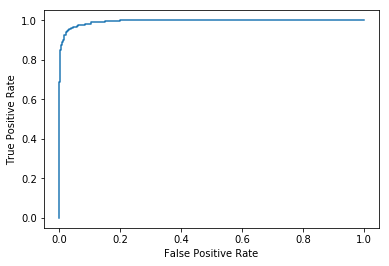

In [142]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [145]:
from sklearn.multiclass import OneVsOneClassifier

In [146]:
sgd_clf=SGDClassifier(random_state=0)
sgd_clf.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
y_score=sgd_clf.decision_function([x[7]])
y_score

array([[ -9696.07250703,  -5819.38294588,  -4169.05684902,
         -9158.94251576,  -4166.77438432,  -3104.54669513,
         -7326.62118379,   4446.32528301, -10088.90968033,
         -8391.63300726]])

In [148]:
ovo_clf=OneVsOneClassifier(sgd_clf)
ovo_clf.fit(x_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [155]:
ovo_clf.predict([some_digit])

array([7], dtype=int8)

In [156]:
len(ovo_clf.estimators_)

45

In [157]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)

In [158]:
y_train_pred

array([0, 1, 2, ..., 8, 9, 8], dtype=int8)

In [159]:
cm=confusion_matrix(y_train,y_train_pred)

In [160]:
cm

array([[176,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  1, 157,   5,   7,   0,   1,   1,   0,   6,   4],
       [  0,   2, 173,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   5, 175,   0,   2,   0,   0,   1,   0],
       [  2,   6,   0,   0, 165,   0,   0,   1,   5,   2],
       [  0,   1,   2,   3,   0, 172,   1,   0,   0,   3],
       [  2,   4,   0,   0,   0,   1, 168,   0,   6,   0],
       [  0,   2,   0,   2,   0,   8,   0, 166,   1,   0],
       [  2,  11,   4,  20,   0,   4,   1,   0, 132,   0],
       [  5,  11,   9,  18,   1,   5,   0,   3,  13, 115]], dtype=int64)

In [161]:
import seaborn as sn

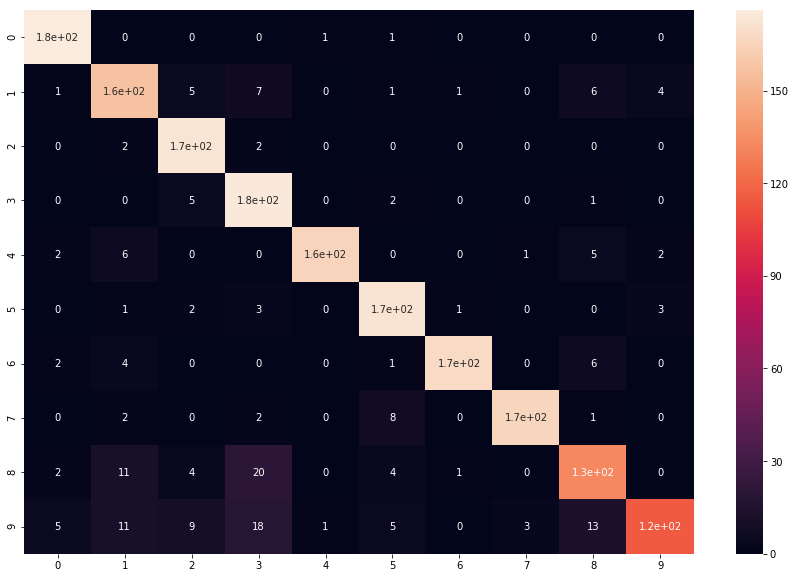

In [162]:
plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True)
plt.show()